In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default ='svg'

In [2]:
# Load the dataset with specified delimiter and handling for inconsistent quotes
raw_df = pd.read_csv("Zomato Chennai Listing 2020.csv")

In [3]:
raw_df.head(3)

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"


In [4]:
raw_df.columns

Index(['Zomato URL', 'Name of Restaurant', 'Address', 'Location', 'Cuisine',
       'Top Dishes', 'Price for 2', 'Dining Rating', 'Dining Rating Count',
       'Delivery Rating', 'Delivery Rating Count', 'Features'],
      dtype='object')

In [5]:
raw_df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          12032 non-null  object 
 8   Dining Rating Count    12032 non-null  object 
 9   Delivery Rating        12032 non-null  object 
 10  Delivery Rating Count  12032 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [7]:
raw_df.shape

(12032, 12)

In [8]:
raw_df.describe()

,Price for 2
count,12032.000000
mean,397.611370
std,332.045938
min,40.000000
25%,200.000000
50%,300.000000
75%,450.000000
max,5000.000000


In [9]:
raw_df = raw_df.drop(columns=['Zomato URL', 'Address', 'Features', 'Top Dishes'])

In [10]:
raw_df.shape

(12032, 8)

In [11]:
raw_df.head(3)

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],500.0,4.3,1500,4.3,9306
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...",1000.0,4.4,3059,4.1,39200
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...",500.0,4.3,1361,4.4,10500


In [12]:
#data cleaning
raw_df['Dining Rating'] = raw_df['Dining Rating'].replace(['None'], 0)
raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].replace(['None', 'Not enough Dining Reviews','Does not offer Dining'], 0)
raw_df['Delivery Rating'] = raw_df['Delivery Rating'].replace(['None'], 0)
raw_df['Delivery Rating Count'] = raw_df['Delivery Rating Count'].replace(['None', 'Does not offer Delivery', 'Not enough Delivery Reviews'], 0)

In [13]:
raw_df.dtypes

Name of Restaurant        object
Location                  object
Cuisine                   object
Price for 2              float64
Dining Rating             object
Dining Rating Count       object
Delivery Rating           object
Delivery Rating Count     object
dtype: object

In [14]:
# Convert relevant columns to numeric (if not already done)

raw_df['Dining Rating'] = pd.to_numeric(raw_df['Dining Rating'])
raw_df['Dining Rating Count'] = pd.to_numeric(raw_df['Dining Rating Count'])
raw_df['Delivery Rating'] = pd.to_numeric(raw_df['Delivery Rating'])
raw_df['Delivery Rating Count'] = pd.to_numeric(raw_df['Delivery Rating Count'])

In [15]:
raw_df.dtypes

Name of Restaurant        object
Location                  object
Cuisine                   object
Price for 2              float64
Dining Rating            float64
Dining Rating Count        int64
Delivery Rating          float64
Delivery Rating Count      int64
dtype: object

In [16]:
raw_df.head(3)

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],500.0,4.3,1500,4.3,9306
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...",1000.0,4.4,3059,4.1,39200
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...",500.0,4.3,1361,4.4,10500


In [17]:
#replacing the bracket with empty
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace(r'[^\w\s]', ' ', regex=True)  # Remove special characters
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace(',',' ')  
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace(' ', ' ')

In [18]:
raw_df.head()

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,500.0,4.3,1500,4.3,9306
1,Sukkubhai Biriyani,Alandur,Biryani North Indian Mughlai Des...,1000.0,4.4,3059,4.1,39200
2,SS Hyderabad Biryani,Kodambakkam,Biryani North Indian Chinese Ara...,500.0,4.3,1361,4.4,10500
3,KFC,Perambur,Burger Fast Food Finger Food Bev...,500.0,4.0,1101,4.0,11200
4,Tasty Kitchen,Perambur,Chinese Biryani North Indian Che...,450.0,4.2,617,4.1,22400


In [19]:
zomato_df = raw_df
zomato_df.shape

(12032, 8)

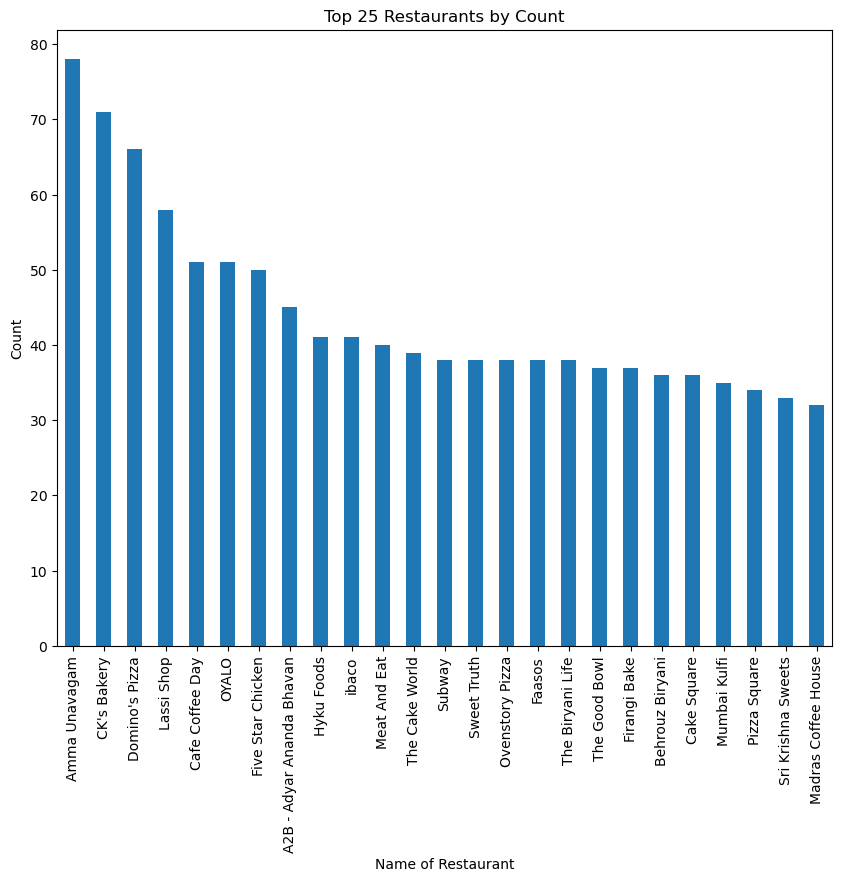

In [20]:
import matplotlib.pyplot as plt

# Get the value counts
restaurant_counts = zomato_df['Name of Restaurant'].value_counts()
# Plot the bar graph
plt.figure(figsize=(10, 8))
restaurant_counts.head(25).plot(kind='bar')
plt.title('Top 25 Restaurants by Count')
plt.xlabel('Name of Restaurant')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

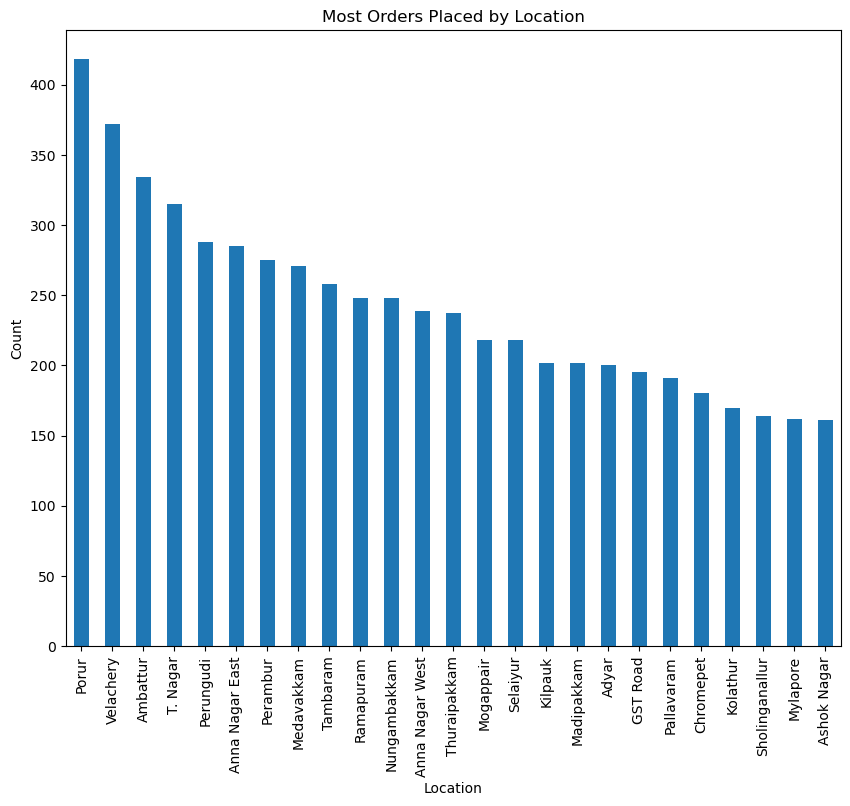

In [21]:
# Get the count of each location
location_counts = zomato_df['Location'].value_counts().head(25)

# Plot the bar graph
plt.figure(figsize=(10, 8))
location_counts.plot(kind='bar')
plt.title('Most Orders Placed by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

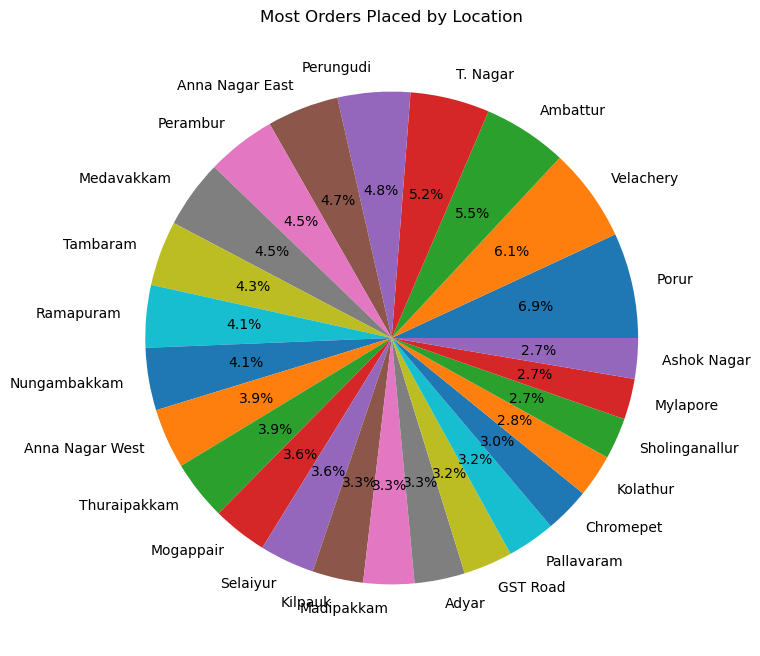

In [22]:
# Plot the pie chart
plt.figure(figsize=(10, 8))
location_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Most Orders Placed by Location')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()


In [23]:
zomato_df.head()

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,500.0,4.3,1500,4.3,9306
1,Sukkubhai Biriyani,Alandur,Biryani North Indian Mughlai Des...,1000.0,4.4,3059,4.1,39200
2,SS Hyderabad Biryani,Kodambakkam,Biryani North Indian Chinese Ara...,500.0,4.3,1361,4.4,10500
3,KFC,Perambur,Burger Fast Food Finger Food Bev...,500.0,4.0,1101,4.0,11200
4,Tasty Kitchen,Perambur,Chinese Biryani North Indian Che...,450.0,4.2,617,4.1,22400


In [24]:
# Find the restaurant with the highest dining rating count
highest_dining_count = zomato_df.loc[zomato_df['Dining Rating Count'].idxmax()]

# Display the restaurant details
highest_dining_count

Name of Restaurant                     Coal Barbecues
Location                                    Velachery
Cuisine                    North Indian     Chinese  
Price for 2                                    1400.0
Dining Rating                                     4.4
Dining Rating Count                              9410
Delivery Rating                                   0.0
Delivery Rating Count                               0
Name: 89, dtype: object

                             Name of Restaurant  Delivery Rating Count
55                               Guntur Gongura                  59900
251                          Hotelkaar Biriyani                  51700
22                    Supriya Andhra Restaurant                  50100
232                    Sapthagiri Tiffin Centre                  47200
8822                   Sangeetha Veg Restaurant                  45500
9                      Sangeetha Veg Restaurant                  39600
1                            Sukkubhai Biriyani                  39200
40                         Krishna's Dosa Kadai                  34600
493   Suryas Chettinad Multi Cuisine Restaurant                  32600
8826                   Sangeetha Veg Restaurant                  28800


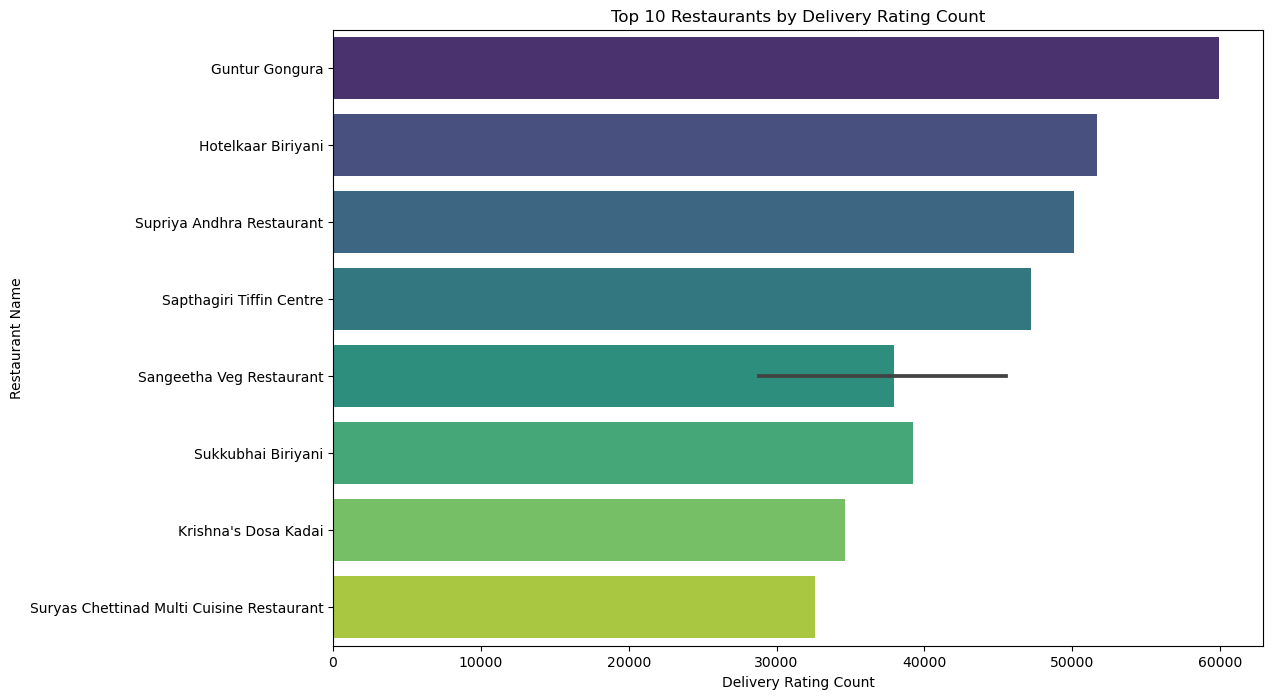

In [25]:
#top 10 restaurant by delivery count

import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by Delivery Rating Count in descending order
top_10_delivery = zomato_df.sort_values(by='Delivery Rating Count', ascending=False).head(10)

# Display the top 10 restaurants
print(top_10_delivery[['Name of Restaurant', 'Delivery Rating Count']])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Delivery Rating Count', y='Name of Restaurant', data=top_10_delivery, palette='viridis')
plt.title('Top 10 Restaurants by Delivery Rating Count')
plt.xlabel('Delivery Rating Count')
plt.ylabel('Restaurant Name')
plt.show()




                             Name of Restaurant  Dining Rating Count
55                               Guntur Gongura                 2449
251                          Hotelkaar Biriyani                 1078
22                    Supriya Andhra Restaurant                 1992
232                    Sapthagiri Tiffin Centre                 1335
8822                   Sangeetha Veg Restaurant                 1565
9                      Sangeetha Veg Restaurant                 1578
1                            Sukkubhai Biriyani                 3059
40                         Krishna's Dosa Kadai                  692
493   Suryas Chettinad Multi Cuisine Restaurant                  349
8826                   Sangeetha Veg Restaurant                 1159


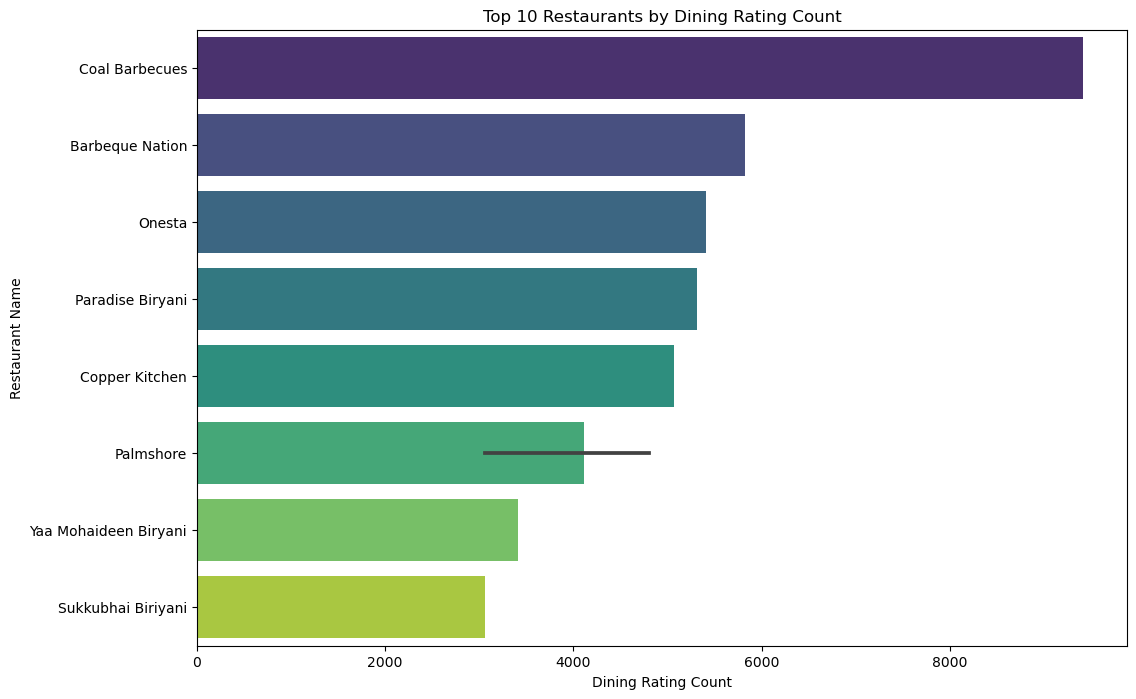

In [26]:
#Top 10 Restaurants by Dining Rating Count

import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by Delivery Rating Count in descending order
top_10_dining = zomato_df.sort_values(by='Dining Rating Count', ascending=False).head(10)

# Display the top 10 restaurants
print(top_10_delivery[['Name of Restaurant', 'Dining Rating Count']])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Dining Rating Count', y='Name of Restaurant', data=top_10_dining, palette='viridis')
plt.title('Top 10 Restaurants by Dining Rating Count')
plt.xlabel('Dining Rating Count')
plt.ylabel('Restaurant Name')
plt.show()




The location with the highest number of restaurants is Porur with 418 restaurants.


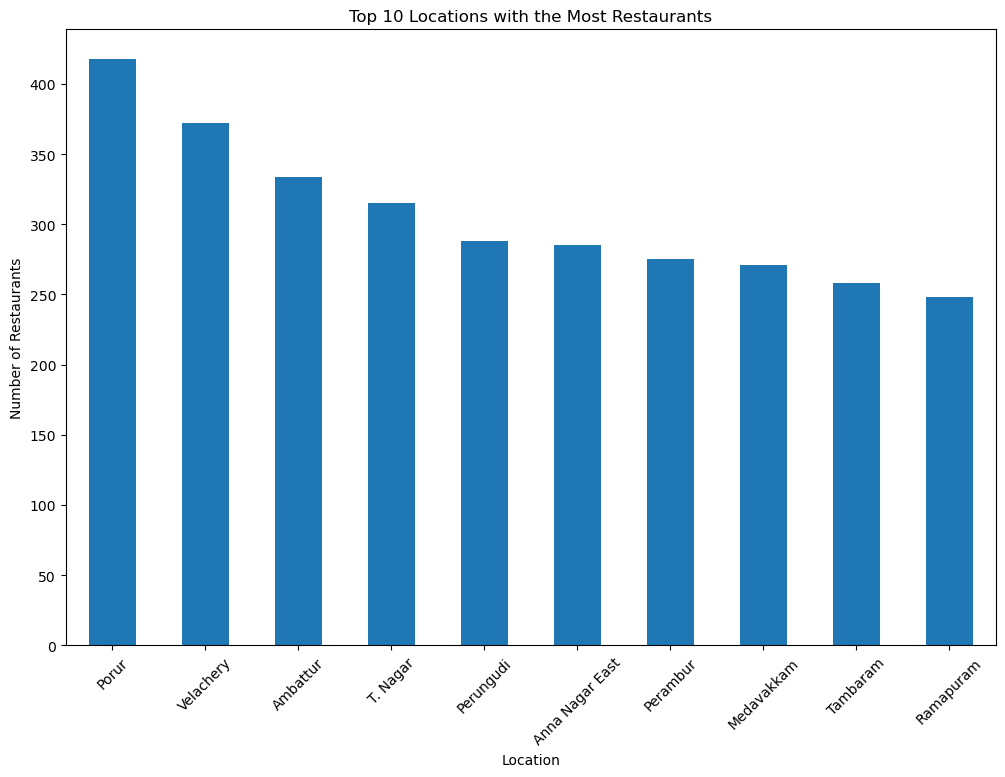

In [27]:
#Top 10 loacation with most of resatuarant

# Extract and count the number of restaurants per location
location_counts = zomato_df['Location'].value_counts()
location_counts
# Identify the location with the highest count
max_location = location_counts.idxmax()
max_count = location_counts.max()

# Display the location with the highest count
print(f"The location with the highest number of restaurants is {max_location} with {max_count} restaurants.")

# Visualize the top 10 locations
top_locations = location_counts.head(10)

plt.figure(figsize=(12, 8))
top_locations.plot(kind='bar')
plt.title('Top 10 Locations with the Most Restaurants')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

In [28]:
Dining_Rating_df = zomato_df['Dining Rating'].value_counts().reset_index()
Dining_Rating_df.rename(columns = {'index' :'Dining Rating', 'RATING_TYPE':'COUNT OF RESTAURANTS'}, inplace=True)
Dining_Rating_df

,Dining Rating,Dining Rating
0,0.0,5351
1,3.6,584
2,3.5,553
3,3.7,525
4,3.4,500
5,3.3,463
6,3.8,460
7,3.2,433
8,3.9,379
9,3.1,363


In [29]:
#fig = px.pie(Dining_Rating_df, names='Dining Rating', values='COUNT OF RESTAURANTS', color = 'Dining Rating', title='Percentage of restaurants by dining rating type').update_traces(textposition='inside', textinfo='percent+label')
#fig.show()

In [30]:
#finding seafood restaurant by dining rating

seafood_df = zomato_df[zomato_df['Cuisine'].str.contains('Seafood')]
seafood_df.sort_values(by='Dining Rating', ascending=False).head(30)


,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
195,The Marina,Nungambakkam,Seafood North Indian Chinese,1600.0,4.8,1082,4.3,373
292,Alchemy Bar & Lounge,"Hotel Rajpark, Alwarpet",Continental Finger Food Seafood ...,2000.0,4.5,432,0.0,0
214,Sera - The Tapas Bar & Restaurant,Gopalapuram,Finger Food Seafood Italian Cont...,1600.0,4.5,964,3.4,50
358,The Wharf 2.0 - Radisson BLU Templebay,"Radisson Blu Temple Bay, Mamallapuram",Seafood Mediterranean Italian No...,3000.0,4.4,517,0.0,0
342,L'attitude 49,Grande Bay Resort,Singaporean Thai Asian Chinese ...,1800.0,4.4,563,0.0,0
315,Layalee,Ekkaduthangal,Arabian BBQ Seafood Chinese ...,700.0,4.4,586,4.1,143
282,Bay View - Taj Fisherman's Cove Resort & Spa,"Taj Fisherman's Cove Resort & Spa, Kanchipuram...",Seafood South Indian Andhra Kera...,3500.0,4.4,678,0.0,0
96,Urban Spatula,Anna Nagar West,Continental Seafood Biryani Ital...,800.0,4.4,794,4.3,911
9028,Copper Kitchen,Velachery,North Indian Chinese Chettinad S...,1000.0,4.3,814,3.6,4673
9027,Copper Kitchen,Kotturpuram,North Indian Chinese Chettinad S...,1000.0,4.3,1739,3.7,8659


In [31]:
#finding seafood restaurant by delivery rating

seafood_df = zomato_df[zomato_df['Cuisine'].str.contains('Seafood')]
seafood_df=seafood_df.sort_values(by='Delivery Rating', ascending=False).head(30)
seafood_df

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
473,Dynasty,"Harrisons Hotel, Nungambakkam",Chinese Seafood,1200.0,4.2,337,4.6,779
2910,Taj Thalapakattu Biriyani,Poonamalle,North Indian Chinese Seafood Bev...,600.0,3.4,42,4.4,831
622,Hotel Runs,Adyar,North Indian Chinese Seafood Bir...,650.0,3.9,304,4.3,1386
376,China Town,Gopalapuram,Chinese Seafood,1200.0,4.1,468,4.3,637
96,Urban Spatula,Anna Nagar West,Continental Seafood Biryani Ital...,800.0,4.4,794,4.3,911
903,Chidambaram New Moorthy Cafe,Anna Nagar West,North Indian Seafood Chinese,500.0,4.1,192,4.3,715
195,The Marina,Nungambakkam,Seafood North Indian Chinese,1600.0,4.8,1082,4.3,373
1398,Nite Bite,Saidapet,Chinese Seafood North Indian Bir...,450.0,3.6,119,4.3,1429
14,Hotel Paramount,Kilpauk,North Indian Chinese Seafood Sou...,500.0,4.3,1266,4.2,17700
252,Pandia's Avenue,Royapuram,North Indian Chinese Biryani Sou...,750.0,4.0,419,4.2,6757


In [32]:
#highest rated Dining restaurant

highest_rated_Dining_df = zomato_df[zomato_df['Dining Rating']>=4.5]
highest_rated_Dining_df = highest_rated_Dining_df.sort_values(by='Dining Rating', ascending=False)
highest_rated_Dining_df

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
184,Gossip Fusion Bistro,Kanathur,Italian Continental Burger Sandw...,1500.0,4.9,996,4.3,500
192,Kabab Corner,Egmore,Kebab Rolls Mughlai,450.0,4.9,1053,4.3,2080
57,Brownie Heaven,Royapettah,Bakery Desserts Beverages,350.0,4.9,842,4.3,2270
320,Bombay Kulfi,Adyar,Ice Cream,200.0,4.9,534,4.3,1476
155,The Sandwich Shop,West Mambalam,Sandwich Fast Food Beverages,300.0,4.9,584,4.4,895
...,...,...,...,...,...,...,...,...
243,Asia Kitchen by Mainland China,"The Spring Hotel, Nungambakkam",Momos Asian Chinese Sushi,1800.0,4.5,872,4.1,882
270,ID,"Sathyam Cinemas Complex, Royapettah",South Indian,300.0,4.5,760,4.4,487
284,Absolute Thai,Foodies Kitchen,Thai Asian,1000.0,4.5,692,4.0,197
289,Kuuraku,Vadapalani,Japanese,1200.0,4.5,358,3.9,42


In [33]:
#highest rated delivery restaurant
highest_rated_Delivery_df = zomato_df[zomato_df['Delivery Rating']>=4.5]
highest_rated_Delivery_df = highest_rated_Delivery_df.head(10)
highest_rated_Delivery_df

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
62,Amadora Gourmet Ice Cream & Sorbet,Nungambakkam,Desserts Ice Cream,500.0,4.8,1516,4.5,361
78,Shri Rajasthani Dhaba,Anna Nagar West,Rajasthani North Indian,500.0,4.5,983,4.5,5537
92,Fruit Shop On Greams Road,Thousand Lights,Beverages Fast Food Healthy Food ...,350.0,4.5,609,4.6,1699
163,Momo Sa-Khang by Kailash Kitchen,Choolaimedu,Momos Chinese,350.0,4.8,1658,4.5,2825
164,La Chocolate,Egmore,Bakery Desserts Italian Continen...,800.0,4.0,256,4.5,1574
370,The Kandyan,Besant Nagar,North Indian South Indian Sri Lankan...,450.0,4.4,482,4.5,1704
384,Firdouse,Triplicane,North Indian Mughlai Chinese Che...,800.0,3.7,528,4.5,5228
473,Dynasty,"Harrisons Hotel, Nungambakkam",Chinese Seafood,1200.0,4.2,337,4.6,779
764,The Grand Sweets and Snacks - Amirtham Restaurant,Anna Nagar West,Mithai North Indian South Indian,500.0,4.1,242,4.6,2603
963,The Baker Ninja,Alwarpet,Bakery Coffee,500.0,4.1,112,4.5,145


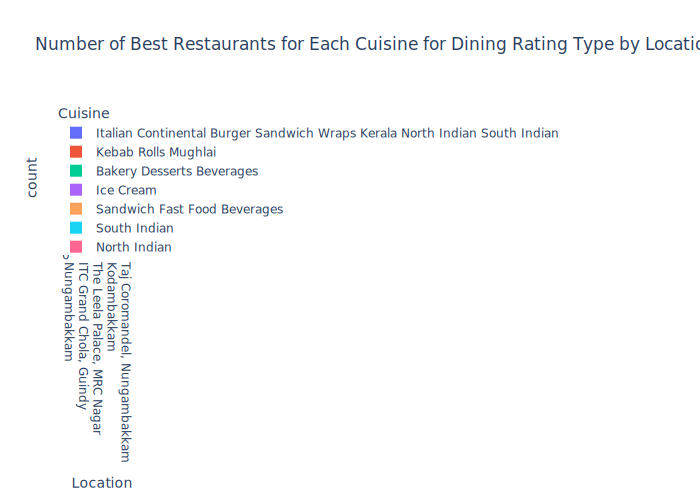

In [34]:
fig = px.histogram(
    highest_rated_Dining_df, 
    x='Location', 
    color='Cuisine', 
    title="Number of Best Restaurants for Each Cuisine for Dining Rating Type by Location"
).update_xaxes(categoryorder='total descending')

fig.show()

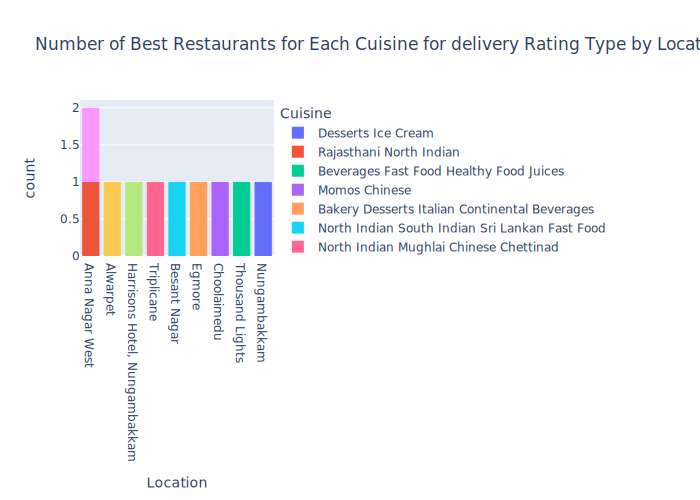

In [35]:
fig = px.histogram(
    highest_rated_Delivery_df, 
    x='Location', 
    color='Cuisine', 
    title="Number of Best Restaurants for Each Cuisine for delivery Rating Type by Location"
).update_xaxes(categoryorder='total descending')

fig.show()

In [36]:
highest_rated_delivery_df = zomato_df[zomato_df['Delivery Rating']>=4.5]
highest_rated_delivery_df = highest_rated_delivery_df.sort_values(by='Delivery Rating', ascending=False)
highest_rated_delivery_df

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
9977,ibaco,Mylapore,Ice Cream,200.0,3.6,55,4.7,230
3301,Mo Thickshake And Snackers,Vadapalani,Beverages,300.0,0.0,0,4.7,590
4371,Mumbai Kulfi,Pallavaram,Desserts,150.0,3.7,11,4.7,141
1985,Arabian Plate,Adambakkam,Arabian Biryani,300.0,3.7,58,4.7,491
11767,Green Crush,Alwarpet,Beverages,200.0,0.0,0,4.6,116
...,...,...,...,...,...,...,...,...
78,Shri Rajasthani Dhaba,Anna Nagar West,Rajasthani North Indian,500.0,4.5,983,4.5,5537
9051,A2B - Adyar Ananda Bhavan,T. Nagar,Mithai Street Food Fast Food Ice...,300.0,3.0,153,4.5,88
9086,Brownie Heaven,Thiruvanmiyur,Desserts Bakery,350.0,0.0,0,4.5,391
9089,Brownie Heaven,Egmore,Bakery Desserts Beverages,350.0,3.9,46,4.5,152


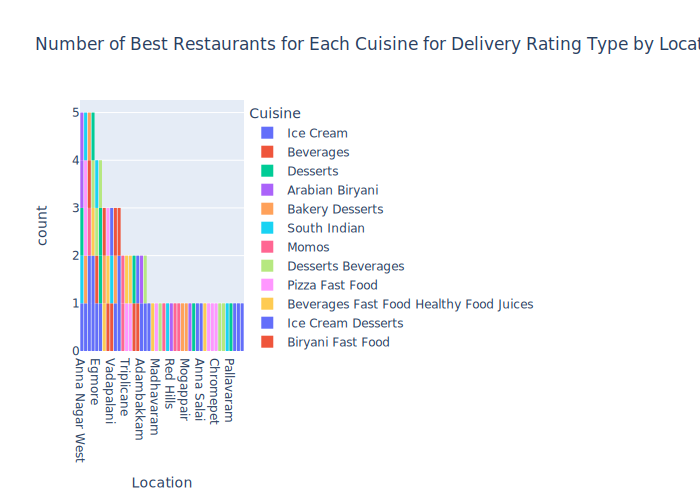

In [37]:
fig = px.histogram(
    highest_rated_delivery_df, 
    x='Location', 
    color='Cuisine', 
    title="Number of Best Restaurants for Each Cuisine for Delivery Rating Type by Location"
).update_xaxes(categoryorder='total descending')

fig.show()

In [38]:
highest_rated_Dining_df = highest_rated_Dining_df.groupby(by=['Location','Cuisine'])['Price for 2'].mean().reset_index()
highest_rated_Dining_df.head()

,Location,Cuisine,Price for 2
0,Adyar,Chinese Thai,800.0
1,Adyar,Ice Cream,200.0
2,Adyar,North Indian Chettinad Mughlai D...,1800.0
3,Adyar,South Indian,500.0
4,Alwarpet,Desserts Ice Cream,350.0


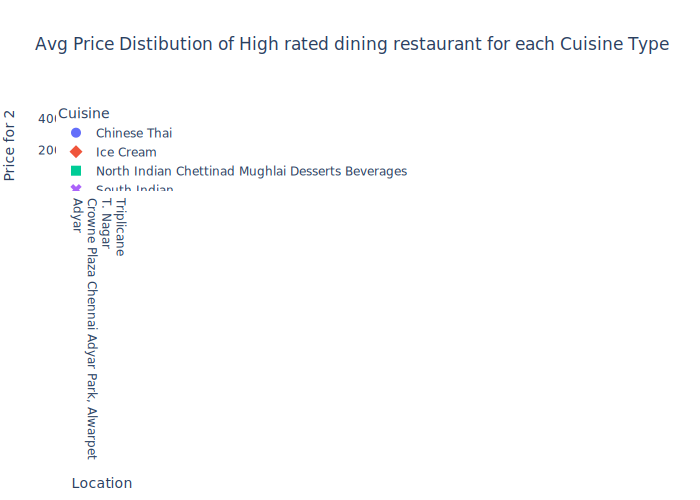

In [39]:
#Avg Price Distibution of High rated dining restaurant

fig = px.scatter(highest_rated_Dining_df, x="Location", y="Price for 2", color="Cuisine", symbol="Cuisine",
 title=' Avg Price Distibution of High rated dining restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()

In [40]:
highest_rated_delivery_df = highest_rated_Delivery_df.groupby(by=['Location','Cuisine'])['Price for 2'].mean().reset_index()
highest_rated_delivery_df.head()

,Location,Cuisine,Price for 2
0,Alwarpet,Bakery Coffee,500.0
1,Anna Nagar West,Mithai North Indian South Indian,500.0
2,Anna Nagar West,Rajasthani North Indian,500.0
3,Besant Nagar,North Indian South Indian Sri Lankan...,450.0
4,Choolaimedu,Momos Chinese,350.0


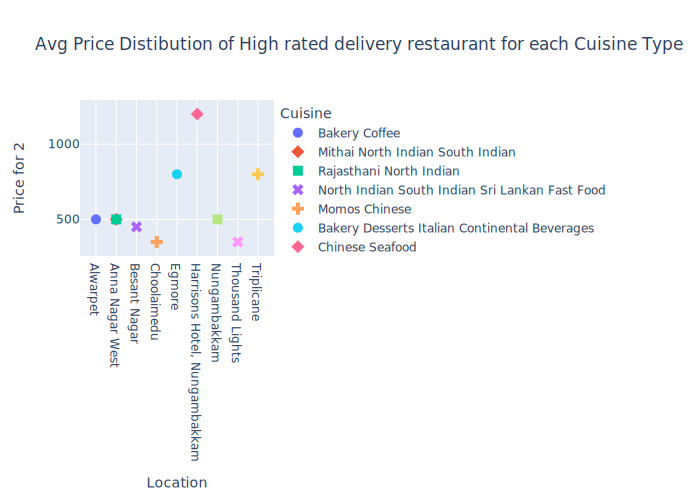

In [41]:
fig = px.scatter(highest_rated_delivery_df, x="Location", y="Price for 2", color="Cuisine", symbol="Cuisine",
 title=' Avg Price Distibution of High rated delivery restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()

In [42]:
# Which areas have a large number of Briyani Restaurant 

briyani_reataurant_df = zomato_df[zomato_df['Cuisine'].str.contains('Biryani')]
briyani_reataurant_df

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,500.0,4.3,1500,4.3,9306
1,Sukkubhai Biriyani,Alandur,Biryani North Indian Mughlai Des...,1000.0,4.4,3059,4.1,39200
2,SS Hyderabad Biryani,Kodambakkam,Biryani North Indian Chinese Ara...,500.0,4.3,1361,4.4,10500
4,Tasty Kitchen,Perambur,Chinese Biryani North Indian Che...,450.0,4.2,617,4.1,22400
6,Bai Veetu Kalyanam,Navallur,Biryani,350.0,0.0,0,4.3,1061
...,...,...,...,...,...,...,...,...
12011,Bowl Bazaar,Anna Nagar East,North Indian South Indian Chinese ...,500.0,0.0,0,0.0,0
12012,Bowl Bazaar,Ashok Nagar,North Indian South Indian Chinese ...,500.0,0.0,0,0.0,0
12013,Bowl Bazaar,Perungudi,North Indian South Indian Chinese ...,500.0,0.0,0,0.0,0
12014,Bowl Bazaar,Adyar,North Indian South Indian Chinese ...,500.0,0.0,0,0.0,0


In [43]:
briyani_reataurant_df = briyani_reataurant_df.groupby(by='Location').agg({'Name of Restaurant':'count', 'Price for 2':'mean'}).rename(columns={'Name of Restaurant': 'COUNT OF RESTAURANTS'})
briyani_reataurant_df = briyani_reataurant_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)
briyani_reataurant_df = briyani_reataurant_df.reset_index()
briyani_reataurant_df.head()

,Location,COUNT OF RESTAURANTS,Price for 2
0,Porur,64,397.656250
1,Ambattur,57,406.140351
2,Perungudi,55,440.909091
3,Velachery,54,461.111111
4,T. Nagar,52,444.230769


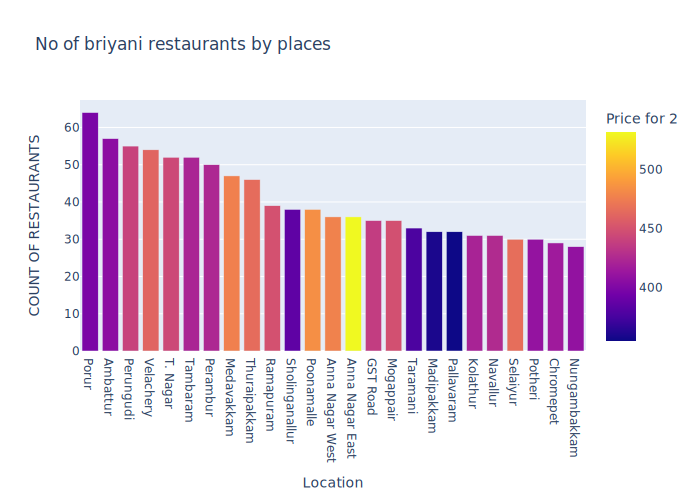

In [44]:
fig = px.bar(briyani_reataurant_df, x='Location', y='COUNT OF RESTAURANTS', color='Price for 2', title = 'No of briyani restaurants by places')
fig.show()

In [45]:
price_dining_rating_df = zomato_df.groupby(['Cuisine', 'Dining Rating'])['Price for 2'].mean().reset_index().head(10)
price_dining_rating_df

,Cuisine,Dining Rating,Price for 2
0,American,0.0,500.0
1,American Andhra Asian Beverages ...,2.4,800.0
2,American Arabian Italian Mexican...,0.0,150.0
3,American BBQ,0.0,400.0
4,American Continental,0.0,400.0
5,American Continental,4.1,1600.0
6,American Continental European It...,3.9,700.0
7,American Continental Italian Nor...,4.1,800.0
8,American Fast Food,0.0,575.0
9,American Fast Food,2.7,300.0


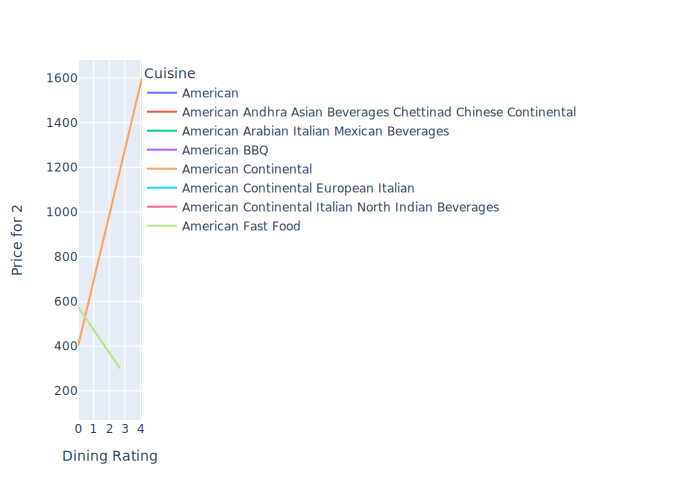

In [46]:
fig = px.line(price_dining_rating_df, y='Price for 2', x='Dining Rating', color='Cuisine')
fig.show()

In [47]:
price_delivery_rating_df = zomato_df.groupby(['Cuisine', 'Delivery Rating'])['Price for 2'].mean().reset_index().head(10)
price_delivery_rating_df

,Cuisine,Delivery Rating,Price for 2
0,American,3.9,500.0
1,American Andhra Asian Beverages ...,0.0,800.0
2,American Arabian Italian Mexican...,0.0,150.0
3,American BBQ,0.0,400.0
4,American Continental,0.0,400.0
5,American Continental,3.8,1600.0
6,American Continental European It...,3.9,700.0
7,American Continental Italian Nor...,3.8,800.0
8,American Fast Food,0.0,550.0
9,American Fast Food,3.6,500.0


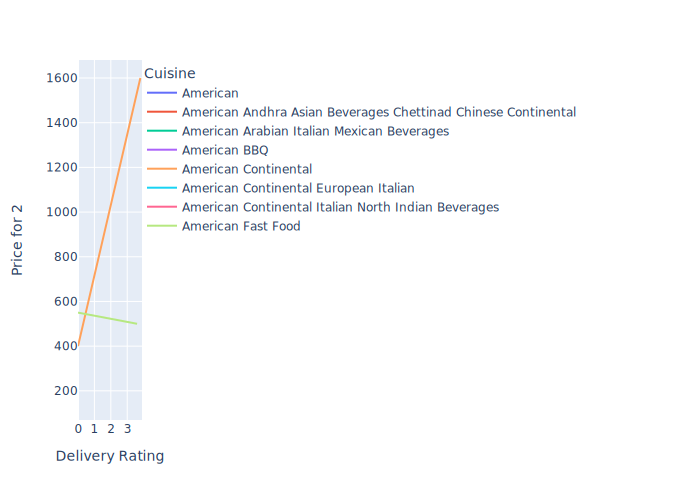

In [48]:
fig = px.line(price_delivery_rating_df, y='Price for 2', x='Delivery Rating', color='Cuisine')
fig.show()

In [49]:
#avg price for 2 by loaction
location_price_df =zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index()
location_price_df = location_price_df.sort_values('Price for 2', ascending=False).head(50)
location_price_df

,Location,Price for 2
224,"Taj Fisherman's Cove Resort & Spa, Kanchipuram...",3333.333333
110,"ITC Grand Chola, Guindy",3133.333333
223,"Taj Coromandel, Nungambakkam",3020.000000
193,"Radisson Blu Temple Bay, Mamallapuram",3000.000000
234,"The Park, Nungambakkam",2800.000000
222,"Taj Club House, Thousand Lights",2666.666667
249,"Trident, GST Road",2666.666667
36,"Crowne Plaza Chennai Adyar Park, Alwarpet",2650.000000
195,"Radisson Blu, GST Road",2640.000000
233,"The Leela Palace, MRC Nagar",2566.666667


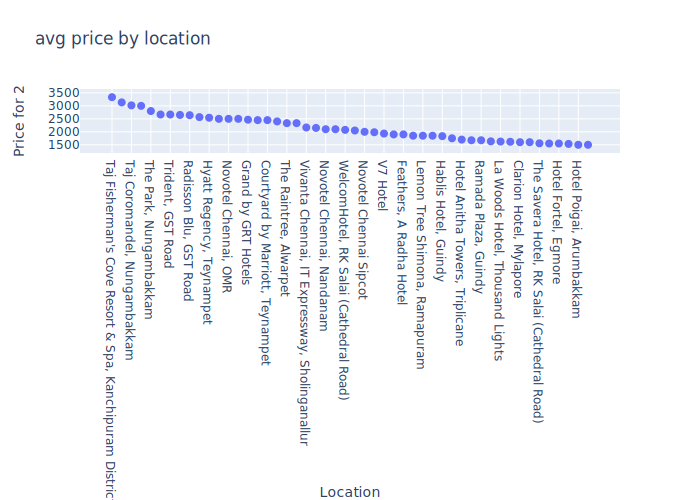

In [50]:
fig = px.scatter(location_price_df, x='Location', y='Price for 2', title='avg price by location').update_traces(marker_size=8)
fig.show()

In [51]:
#Finding max price for 2
max_price = zomato_df['Price for 2'].max()
one_fourth_price = max_price/4
one_fourth_price

1250.0

In [52]:
zomato_df.head(1)

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,500.0,4.3,1500,4.3,9306


In [53]:
aff_rest_df = zomato_df[['Name of Restaurant', 'Location', 'Cuisine', 'Price for 2']]
aff_rest_df = aff_rest_df[aff_rest_df['Price for 2'] <= 1250]
aff_rest_df.sort_values(by = 'Price for 2', inplace= True)
aff_rest_df


,Name of Restaurant,Location,Cuisine,Price for 2
4685,Soda Hub,"OMR Food Street, Navallur",Beverages,40.0
6854,Planet Soda,"OMR Food Street, Kandanchavadi",Beverages Juices,50.0
7405,Indian Coffee House,Vepery,Beverages Juices,50.0
8355,Kaafemaa,Ambattur,Beverages,50.0
1448,Mamee Soup,West Mambalam,Healthy Food,60.0
...,...,...,...,...
6746,Biryani Centre,Triplicane,Biryani,1200.0
165,Copper Chimney,Gopalapuram,North Indian Arabian Biryani Mug...,1200.0
316,Prive Restaurant,Mylapore,North Indian Continental Mexican ...,1200.0
3697,Zhouyu,Alwarpet,Asian,1200.0


In [54]:
# Finding the highest Dining  rated list of restaurants

highest_rate_dining_df = zomato_df[['Name of Restaurant', 'Location', 'Cuisine', 'Dining Rating', 'Price for 2']]
highest_rate_dining_df= highest_rate_dining_df[highest_rate_dining_df['Dining Rating'] >= 4.5]
highest_rate_dining_df.sort_values(by='Price for 2', inplace=True)
highest_rate_dining_df

,Name of Restaurant,Location,Cuisine,Dining Rating,Price for 2
108,Rayar's Mess,Mylapore,South Indian,4.7,100.0
178,Royal Sandwich Shop,Alwarpet,Fast Food Desserts Beverages,4.7,150.0
9541,Bombay Kulfi,Anna Nagar East,Ice Cream,4.6,200.0
320,Bombay Kulfi,Adyar,Ice Cream,4.9,200.0
50,Andhikkadai,Velachery,South Indian,4.6,200.0
...,...,...,...,...,...
445,Dakshin - Crowne Plaza Chennai Adyar Park,"Crowne Plaza Chennai Adyar Park, Alwarpet",South Indian Kerala Andhra,4.6,2500.0
395,Southern Spice - Taj Coromandel,"Taj Coromandel, Nungambakkam",South Indian,4.7,3000.0
229,Vasco's - Hilton Chennai,"Hilton Chennai, Guindy",North Indian Continental Asian,4.6,3400.0
443,Avartana - ITC Grand Chola,"ITC Grand Chola, Guindy",South Indian Chinese Desserts,4.8,4500.0


In [55]:
# Finding the highest delivery  rated list of restaurants

highest_rate_delivery_df = zomato_df[['Name of Restaurant', 'Location', 'Cuisine', 'Delivery Rating', 'Price for 2']]
highest_rate_delivery_df= highest_rate_delivery_df[highest_rate_delivery_df['Delivery Rating'] >= 4.5]
highest_rate_delivery_df.sort_values(by='Price for 2', inplace=True)
highest_rate_delivery_df

,Name of Restaurant,Location,Cuisine,Delivery Rating,Price for 2
2151,Cane 4 U,Besant Nagar,Beverages,4.6,100.0
11043,Kulfi Treat,T. Nagar,Desserts Ice Cream Beverages,4.5,100.0
2598,NIC - Natural Ice Creams,T. Nagar,Ice Cream,4.5,150.0
11377,NIC - Natural Ice Creams,Mylapore,Ice Cream,4.5,150.0
3875,A AA E EE Soup Shop,Karapakkam,Sandwich South Indian,4.5,150.0
...,...,...,...,...,...
62,Amadora Gourmet Ice Cream & Sorbet,Nungambakkam,Desserts Ice Cream,4.5,500.0
4742,Cococane,"OMR Food Street, Guduvancheri",South Indian,4.6,600.0
384,Firdouse,Triplicane,North Indian Mughlai Chinese Che...,4.5,800.0
164,La Chocolate,Egmore,Bakery Desserts Italian Continen...,4.5,800.0


In [56]:
highest_aff_dining_df = pd.merge(aff_rest_df, highest_rate_dining_df, how='inner', on=['Name of Restaurant', 'Location'] )
highest_aff_dining_df.head()
highest_aff_dining_df = highest_aff_dining_df [['Name of Restaurant', 'Cuisine_x', 'Location', 'Price for 2_x']]
highest_aff_dining_df.rename(columns={'NAME':'Name of Restaurant','Price for 2_x':'Price for 2', 'Cuisine_x':'Cuisine','Location_x':'Location'},inplace=True)

In [57]:
highest_aff_dining_df.head()

,Name of Restaurant,Cuisine,Location,Price for 2
0,Rayar's Mess,South Indian,Mylapore,100.0
1,Royal Sandwich Shop,Fast Food Desserts Beverages,Alwarpet,150.0
2,Royal Sandwich Shop,Fast Food Desserts Beverages,Alwarpet,150.0
3,Royal Sandwich Shop,Fast Food Desserts Beverages,Alwarpet,150.0
4,Bombay Kulfi,Ice Cream,Anna Nagar East,200.0


In [58]:
zomato_df.head()

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,500.0,4.3,1500,4.3,9306
1,Sukkubhai Biriyani,Alandur,Biryani North Indian Mughlai Des...,1000.0,4.4,3059,4.1,39200
2,SS Hyderabad Biryani,Kodambakkam,Biryani North Indian Chinese Ara...,500.0,4.3,1361,4.4,10500
3,KFC,Perambur,Burger Fast Food Finger Food Bev...,500.0,4.0,1101,4.0,11200
4,Tasty Kitchen,Perambur,Chinese Biryani North Indian Che...,450.0,4.2,617,4.1,22400


In [59]:
highest_aff_delivery_df = pd.merge(aff_rest_df, highest_rate_delivery_df, how='inner', on=['Name of Restaurant', 'Location'] )
highest_aff_delivery_df.head()
highest_aff_delivery_df = highest_aff_delivery_df [['Name of Restaurant', 'Cuisine_x', 'Location', 'Price for 2_x']]
highest_aff_delivery_df.rename(columns={'NAME':'Name of Restaurant','Price for 2_x':'Price for 2', 'Cuisine_x':'Cuisine','Location_x':'Location'},inplace=True)

In [60]:
highest_aff_dining_df.head()

,Name of Restaurant,Cuisine,Location,Price for 2
0,Rayar's Mess,South Indian,Mylapore,100.0
1,Royal Sandwich Shop,Fast Food Desserts Beverages,Alwarpet,150.0
2,Royal Sandwich Shop,Fast Food Desserts Beverages,Alwarpet,150.0
3,Royal Sandwich Shop,Fast Food Desserts Beverages,Alwarpet,150.0
4,Bombay Kulfi,Ice Cream,Anna Nagar East,200.0


In [61]:


dining_mean_votes = zomato_df['Dining Rating Count'].mean()
dining_mean_votes

75.16165226063829

In [62]:


delivery_mean_votes = zomato_df['Delivery Rating Count'].mean()
delivery_mean_votes

713.4231216755319

In [75]:
# Finding list of restaurants that have Votes greater than and equal to Mean of Vote

mean_best_dining_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location','Dining Rating Count']]
mean_best_dining_df= mean_best_dining_df[mean_best_dining_df['Dining Rating Count'] >= 75]
mean_best_dining_df.sort_values(by='Dining Rating Count', inplace=True)
mean_best_dining_df

,Name of Restaurant,Price for 2,Cuisine,Location,Dining Rating Count
2121,Green Onion Restaurant,650.0,North Indian Chinese Kebab Bever...,Pallavaram,75
2110,Western Snacks,200.0,Biryani,Egmore,75
1606,L'Orange,500.0,North Indian Mughlai Chinese,Anna Nagar East,75
10009,Juice Pump,300.0,Beverages Juices Fast Food Momos,Anna Nagar East,75
1695,Yaa Rahman Biriyani,250.0,Biryani,Saligramam,75
...,...,...,...,...,...
9026,Copper Kitchen,1000.0,North Indian Chinese Chettinad S...,Porur,5073
9030,Paradise Biryani,800.0,Biryani North Indian Chinese,Perungudi,5317
74,Onesta,600.0,Pizza Italian Fast Food Beverage...,Semmancheri,5407
9233,Barbeque Nation,1600.0,North Indian Continental Kebab B...,T. Nagar,5821


In [66]:

# Finding list of restaurants that have Votes greater than and equal to Mean of Vote

mean_best_delivery_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location','Dining Rating Count']]
mean_best_delivery_df= mean_rest_delivery_df[mean_rest_delivery_df['Dining Rating Count'] >= 75]
mean_best_delivery_df.sort_values(by='Dining Rating Count', inplace=True)
mean_best_delivery_df

,Name of Restaurant,Price for 2,Cuisine,Location,Dining Rating Count
2121,Green Onion Restaurant,650.0,North Indian Chinese Kebab Bever...,Pallavaram,75
2013,Udipi Sri Durga Bhavan,400.0,South Indian,Poonamalle,75
1419,Amaravathi,600.0,Andhra,Akkarai,75
1875,Desi Dhaba,500.0,North Indian Chinese Chettinad,Padur,75
10244,Meat And Eat,350.0,Burger Fast Food,K.K. Nagar,75
...,...,...,...,...,...
9026,Copper Kitchen,1000.0,North Indian Chinese Chettinad S...,Porur,5073
9030,Paradise Biryani,800.0,Biryani North Indian Chinese,Perungudi,5317
74,Onesta,600.0,Pizza Italian Fast Food Beverage...,Semmancheri,5407
9233,Barbeque Nation,1600.0,North Indian Continental Kebab B...,T. Nagar,5821


In [77]:
#merging best dining df and highest affordable dining df
reliable_best_dining_df = pd.merge(mean_best_dining_df, highest_aff_dining_df, how='inner', on=['Name of Restaurant', 'Location'])
reliable_best_dining_df = reliable_best_dining_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location']]
reliable_best_dining_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2_x':'Price for 2', 'Cuisine_x':'Cuisine',
                                                                 'Location':'Location'},inplace=True)

In [78]:
reliable_best_dining_df

,Name of Restaurant,Price for 2,Cuisine,Location
0,Shmoozie's Hand-Crafted Ice Creams,400.0,Ice Cream Desserts,Egmore
1,Kuuraku,1200.0,Japanese,Vadapalani
2,Bombay Kulfi,200.0,Ice Cream,Anna Nagar East
3,New Pattukottai Kamatchi Mess,550.0,Tamil Chettinad,T. Nagar
4,Wok Monk,1200.0,Asian Chinese Middle Eastern,Anna Nagar West
5,Blind Ch3mistry,700.0,Cafe Continental Italian Dessert...,Teynampet
6,Writer's Cafe,600.0,Cafe American,Taramani
7,Bombay Kulfi,200.0,Ice Cream,Adyar
8,The Sandwich Shop,300.0,Sandwich Fast Food Beverages,West Mambalam
9,Fruit Shop On Greams Road,350.0,Beverages Fast Food Healthy Food ...,Thousand Lights


In [79]:
#merging reliable best delivery df & highest aff deliver _df
reliable_best_delivery_df = pd.merge(mean_best_delivery_df, highest_aff_delivery_df, how='inner', on=['Name of Restaurant', 'Location'])
reliable_best_delivery_df = reliable_best_delivery_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location']]
reliable_best_delivery_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2_x':'Price for 2', 'Cuisine_x':'Cuisine',
                                                                 'Location':'Location'},inplace=True)

In [81]:
reliable_best_delivery_df

,Name of Restaurant,Price for 2,Cuisine,Location
0,ibaco,200.0,Ice Cream,Madipakkam
1,ibaco,200.0,Ice Cream,Madipakkam
2,The Grand Sweets and Snacks - Amirtham Restaurant,500.0,Mithai North Indian South Indian,Vadapalani
3,Amaravathi Andhra Home Foods,250.0,Mithai Street Food,Gopalapuram
4,Dominus,400.0,Chinese Chettinad,Anna Nagar West
5,The Baker Ninja,500.0,Bakery Coffee,Alwarpet
6,The Belgian Waffle Co.,300.0,Desserts Beverages Fast Food,Vadapalani
7,Ibaco,200.0,Ice Cream,Thiruvanmiyur
8,Fruit Shop On Greams Road,350.0,Beverages Fast Food Healthy Food ...,Kilpauk
9,Fruit Shop On Greams Road,350.0,Beverages Fast Food Healthy Food ...,Kilpauk


In [ ]:
zomato_df.head(2)

In [82]:
# Convert 'Dining Rating' to float
zomato_df['Dining Rating'] = zomato_df['Dining Rating'].astype(float)

# Group by 'Dining Rating' and count occurrences
dining_rating_counts = zomato_df.groupby('Dining Rating').size().reset_index(name='COUNT OF RESTAURANTS')

# Display the cleaned data
print(dining_rating_counts)

    Dining Rating  COUNT OF RESTAURANTS
0             0.0                  5351
1             0.3                     1
2             1.0                     1
3             1.7                     2
4             1.9                     3
5             2.0                   354
6             2.1                    10
7             2.2                    20
8             2.3                    32
9             2.4                    46
10            2.5                    71
11            2.6                    99
12            2.7                   138
13            2.8                   192
14            2.9                   257
15            3.0                   302
16            3.1                   363
17            3.2                   433
18            3.3                   463
19            3.4                   500
20            3.5                   553
21            3.6                   584
22            3.7                   525
23            3.8                   460


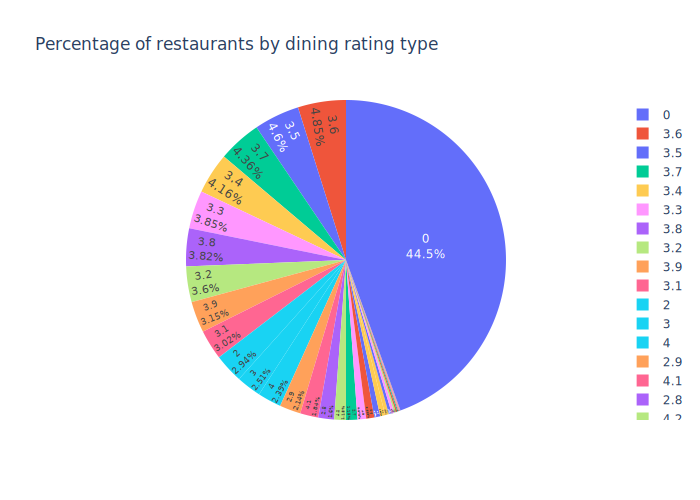

In [83]:
#Percentage of restaurants by dining rating type

import plotly.express as px

# Create the pie chart
fig = px.pie(dining_rating_counts, 
             names='Dining Rating', 
             values='COUNT OF RESTAURANTS', 
             color='Dining Rating', 
             title='Percentage of restaurants by dining rating type')

# Update the trace to place text inside and show percent+label
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the figure
fig.show()

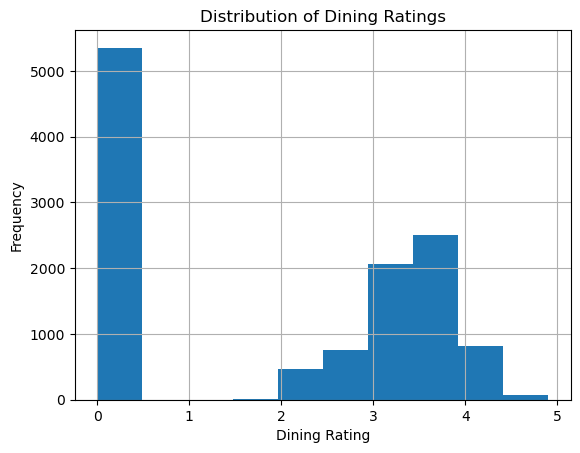

In [84]:
#Distribution of Dining Ratings

import matplotlib.pyplot as plt

# Plot histogram
zomato_df['Dining Rating'].astype(float).hist(bins=10)
plt.title('Distribution of Dining Ratings')
plt.xlabel('Dining Rating')
plt.ylabel('Frequency')
plt.show()

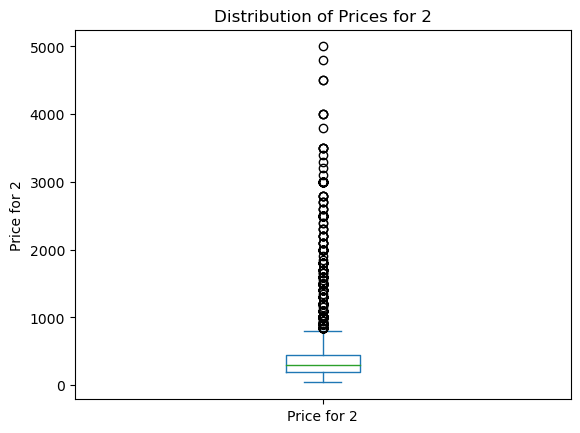

In [85]:
#Distribution of Prices for 2
# Plot boxplot
zomato_df['Price for 2'].plot(kind='box')
plt.title('Distribution of Prices for 2')
plt.ylabel('Price for 2')
plt.show()



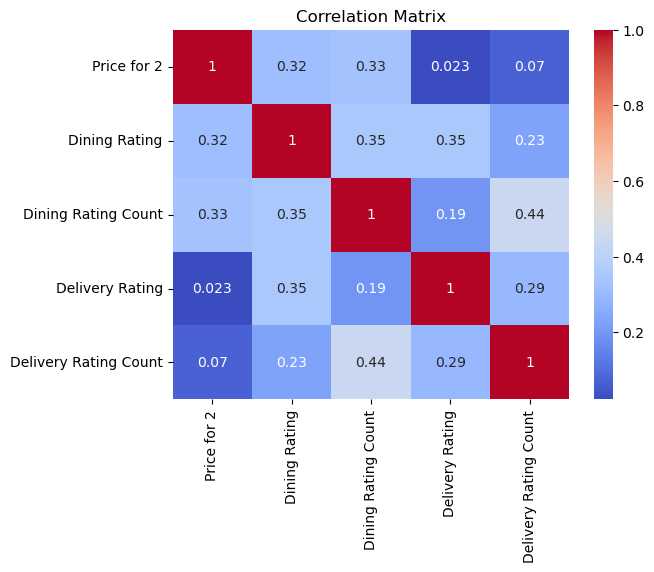

In [86]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = zomato_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [87]:
# Top 10 locations
top_locations = zomato_df['Location'].value_counts().head(10)
print(top_locations)


Porur              418
Velachery          372
Ambattur           334
T. Nagar           315
Perungudi          288
Anna Nagar East    285
Perambur           275
Medavakkam         271
Tambaram           258
Ramapuram          248
Name: Location, dtype: int64


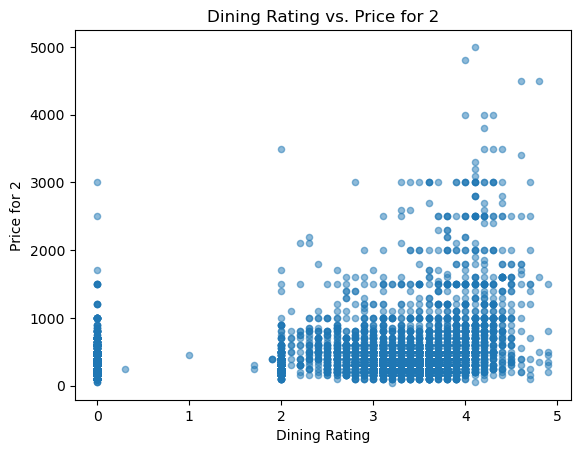

In [88]:
# Scatter plot
zomato_df.plot(kind='scatter', x='Dining Rating', y='Price for 2', alpha=0.5)
plt.title('Dining Rating vs. Price for 2')
plt.xlabel('Dining Rating')
plt.ylabel('Price for 2')
plt.show()


In [89]:
# Extract cuisines

cuisine_counts = zomato_df['Cuisine'].value_counts().head(10)

cuisine_counts

  South Indian                  883
  Fast Food                     295
  Bakery                        266
  South Indian     Chinese      233
  Biryani                       225
  Chinese                       218
  Ice Cream                     200
  North Indian     Chinese      195
  North Indian                  188
  Fast Food     Beverages       177
Name: Cuisine, dtype: int64

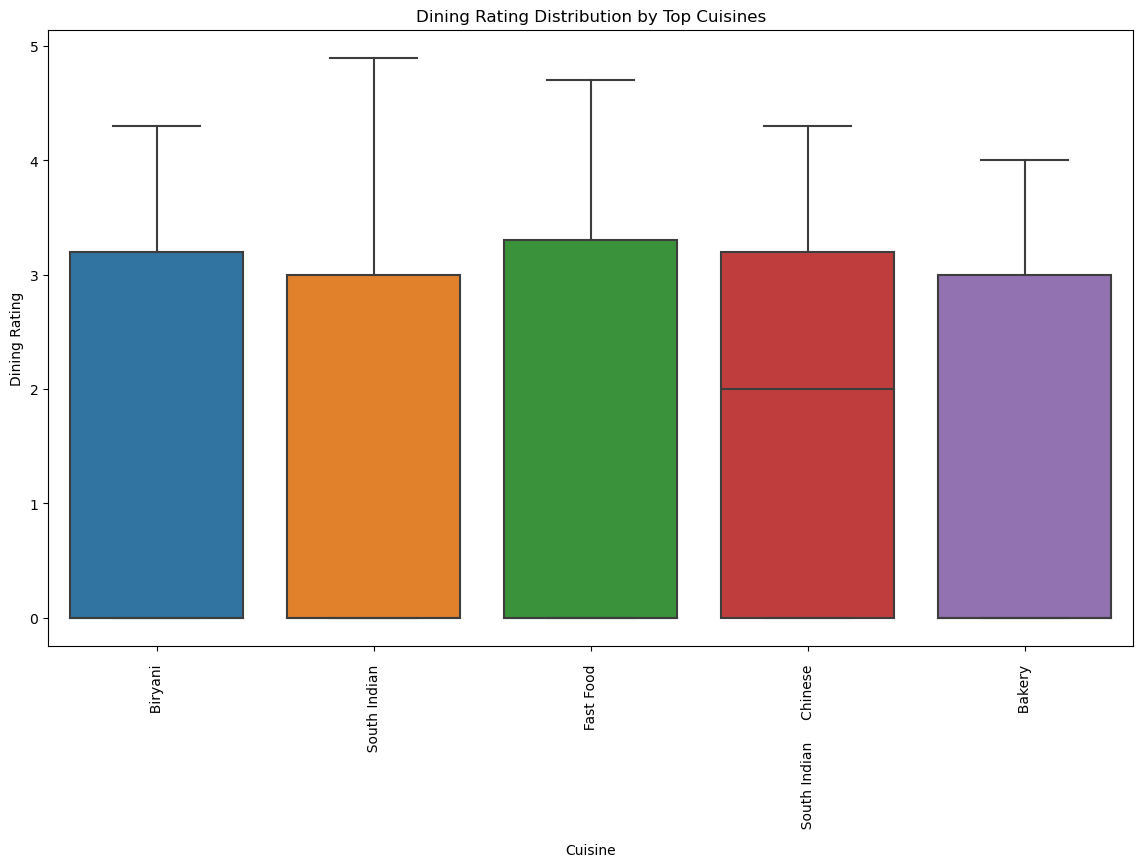

In [90]:
# Create a DataFrame where each row is a cuisine-restaurant pair
# Exploding the 'Cuisine' column
cuisine_df = zomato_df.explode('Cuisine')

# Calculate frequency of each cuisine
cuisine_counts = cuisine_df['Cuisine'].value_counts()

# Select top N cuisines
top_n_cuisines = cuisine_counts.nlargest(5).index  # Change 5 to any number of top cuisines you want to display

# Filter DataFrame to include only the top N cuisines
filtered_cuisine_df = cuisine_df[cuisine_df['Cuisine'].isin(top_n_cuisines)]

# Plot boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Cuisine', y='Dining Rating', data=filtered_cuisine_df)
plt.xticks(rotation=90)
plt.title('Dining Rating Distribution by Top Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Dining Rating')
plt.show()


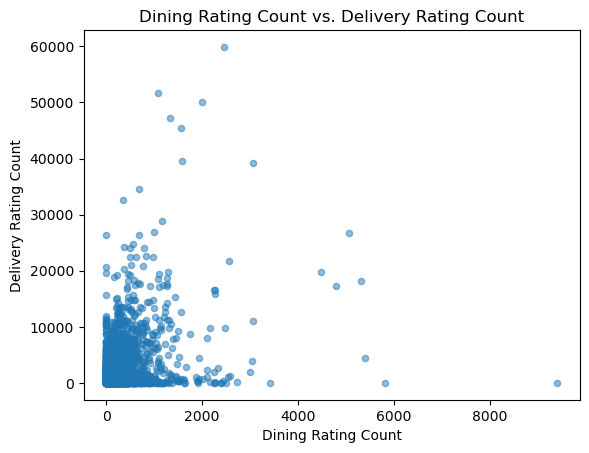

In [91]:
# Scatter plot
zomato_df.plot(kind='scatter', x='Dining Rating Count', y='Delivery Rating Count', alpha=0.5)
plt.title('Dining Rating Count vs. Delivery Rating Count')
plt.xlabel('Dining Rating Count')
plt.ylabel('Delivery Rating Count')
plt.show()


In [92]:
# Calculate average price
average_price = cuisine_df.groupby('Cuisine')['Price for 2'].mean().sort_values(ascending=False)
print(average_price)


Cuisine
  Continental     Asian     Mexican     Italian                    4800.0
  South Indian     Chinese     Desserts                            4500.0
  Continental     European                                         4000.0
  Kebab     Mughlai     Biryani                                    4000.0
  Continental     Burger     Italian     French                    3500.0
                                                                    ...  
  Cafe     Bakery     Juices     North Indian     Street Food       100.0
  Tea     Coffee     Fast Food                                      100.0
  Fast Food     South Indian     Chinese     Kebab                  100.0
  Tea     Coffee                                                    100.0
  Juices     Beverages     Street Food                              100.0
Name: Price for 2, Length: 2423, dtype: float64


In [93]:
# Compare restaurants offering delivery vs. dining
delivery_vs_dining = zomato_df[['Dining Rating', 'Delivery Rating']].notna().sum()
print(delivery_vs_dining)


Dining Rating      12032
Delivery Rating    12032
dtype: int64


In [94]:
# Top 10 restaurants by dining rating
top_restaurants = zomato_df.nlargest(15, 'Dining Rating')[['Name of Restaurant', 'Dining Rating','Location']]
top_restaurants


,Name of Restaurant,Dining Rating,Location
57,Brownie Heaven,4.9,Royapettah
105,Bhangra,4.9,"Mayajaal Multiplex, Kanathur"
155,The Sandwich Shop,4.9,West Mambalam
184,Gossip Fusion Bistro,4.9,Kanathur
192,Kabab Corner,4.9,Egmore
219,Prems Graama Bhojanam,4.9,Adyar
320,Bombay Kulfi,4.9,Adyar
62,Amadora Gourmet Ice Cream & Sorbet,4.8,Nungambakkam
163,Momo Sa-Khang by Kailash Kitchen,4.8,Choolaimedu
195,The Marina,4.8,Nungambakkam


In [95]:
# Top 10 restaurants by delivery rating
top_delivery_restaurants = zomato_df.nlargest(10, 'Delivery Rating')[['Name of Restaurant', 'Delivery Rating','Location']]
top_delivery_restaurants


,Name of Restaurant,Delivery Rating,Location
1985,Arabian Plate,4.7,Adambakkam
3301,Mo Thickshake And Snackers,4.7,Vadapalani
4371,Mumbai Kulfi,4.7,Pallavaram
9977,ibaco,4.7,Mylapore
92,Fruit Shop On Greams Road,4.6,Thousand Lights
473,Dynasty,4.6,"Harrisons Hotel, Nungambakkam"
764,The Grand Sweets and Snacks - Amirtham Restaurant,4.6,Anna Nagar West
1274,Bite Me Cupcakes,4.6,Thiruvanmiyur
1776,Casa Dolce,4.6,Mogappair
2011,Old Mercara,4.6,Anna Salai


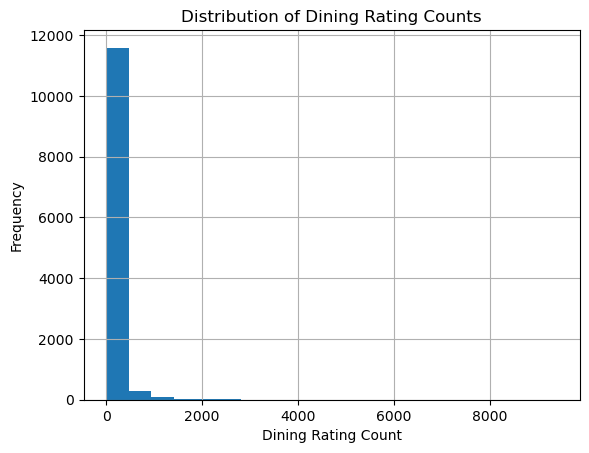

In [96]:
# Plot histogram
zomato_df['Dining Rating Count'].hist(bins=20)
plt.title('Distribution of Dining Rating Counts')
plt.xlabel('Dining Rating Count')
plt.ylabel('Frequency')
plt.show()


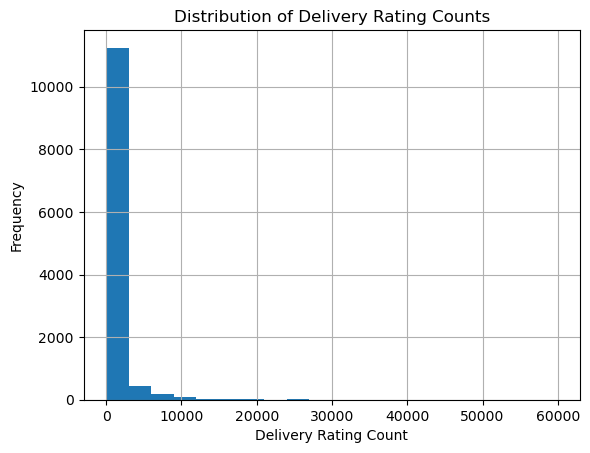

In [97]:
# Plot histogram
zomato_df['Delivery Rating Count'].hist(bins=20)
plt.title('Distribution of Delivery Rating Counts')
plt.xlabel('Delivery Rating Count')
plt.ylabel('Frequency')
plt.show()


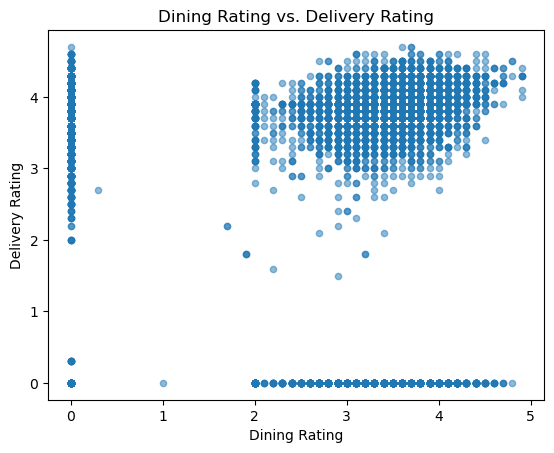

In [98]:
# Scatter plot
zomato_df.plot(kind='scatter', x='Dining Rating', y='Delivery Rating', alpha=0.5)
plt.title('Dining Rating vs. Delivery Rating')
plt.xlabel('Dining Rating')
plt.ylabel('Delivery Rating')
plt.show()


In [99]:
# Calculate average dining rating
average_dining_rating_by_location = zomato_df.groupby('Location')['Dining Rating'].mean().sort_values(ascending=False)
print(average_dining_rating_by_location)


Location
Grand by GRT Hotels                                 4.466667
Sathyam Cinemas Complex, Royapettah                 4.400000
Foodies Kitchen                                     4.366667
Taj Coromandel, Nungambakkam                        4.340000
The Westin Chennai, Velachery                       4.300000
                                                      ...   
Mandaveli                                           0.941463
Liberty Park Hotel, Kodambakkam                     0.000000
Hotel NRS Sakithyan, T. Nagar                       0.000000
Hotel Sathyam Grand Resort, Kanchipuram District    0.000000
Hotel Peninsula, T. Nagar                           0.000000
Name: Dining Rating, Length: 268, dtype: float64


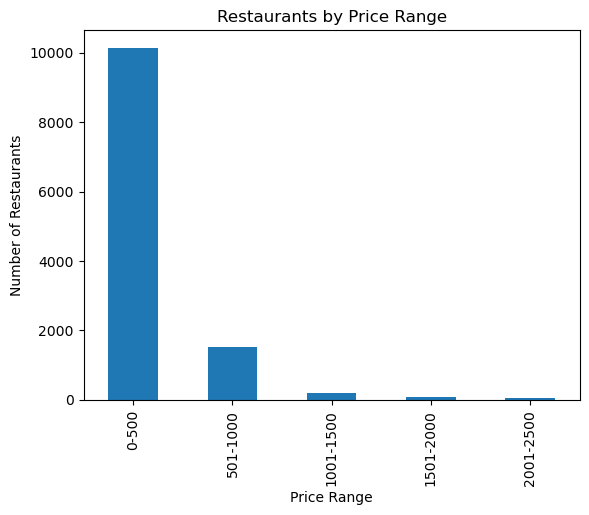

In [100]:
# Categorize restaurants by price range
zomato_df['Price Range'] = pd.cut(zomato_df['Price for 2'], bins=[0, 500, 1000, 1500, 2000, 2500], labels=['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500'])

# Plot distribution
price_range_counts = zomato_df['Price Range'].value_counts().sort_index()
price_range_counts.plot(kind='bar')
plt.title('Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()


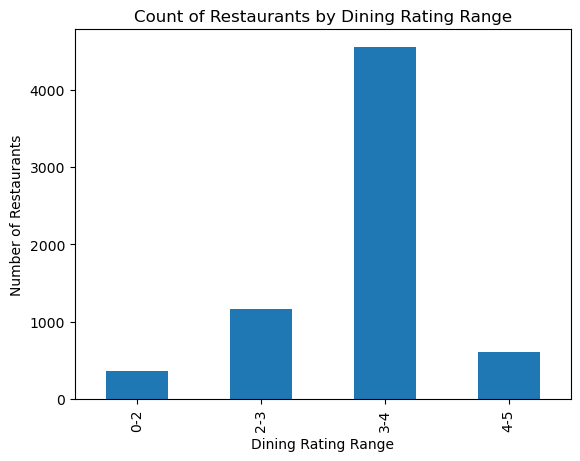

In [102]:
# Categorize dining ratings into ranges
zomato_df['Dining Rating Range'] = pd.cut(zomato_df['Dining Rating'].astype(float), bins=[0, 2, 3, 4, 5], labels=['0-2', '2-3', '3-4', '4-5'])

# Plot distribution
dining_rating_range_counts = zomato_df['Dining Rating Range'].value_counts().sort_index()
dining_rating_range_counts.plot(kind='bar')
plt.title('Count of Restaurants by Dining Rating Range')
plt.xlabel('Dining Rating Range')
plt.ylabel('Number of Restaurants')
plt.show()


In [103]:
# Filter restaurants with highest ratings
high_ratings_restaurants = zomato_df[(zomato_df['Dining Rating'].astype(float) >= 4.5) & (zomato_df['Delivery Rating'].astype(float) >= 4.5)]
print(high_ratings_restaurants[['Name of Restaurant', 'Dining Rating', 'Delivery Rating']])


                     Name of Restaurant  Dining Rating  Delivery Rating
62   Amadora Gourmet Ice Cream & Sorbet            4.8              4.5
78                Shri Rajasthani Dhaba            4.5              4.5
92            Fruit Shop On Greams Road            4.5              4.6
163    Momo Sa-Khang by Kailash Kitchen            4.8              4.5


In [104]:
# Calculate average price by dining rating
average_price_by_dining_rating = zomato_df.groupby('Dining Rating')['Price for 2'].mean()
average_price_by_dining_rating


Dining Rating
0.0     297.269669
0.3     250.000000
1.0     450.000000
1.7     275.000000
1.9     400.000000
2.0     332.768362
2.1     620.000000
2.2     607.500000
2.3     653.125000
2.4     596.739130
2.5     464.084507
2.6     510.101010
2.7     457.608696
2.8     429.427083
2.9     434.824903
3.0     401.788079
3.1     414.738292
3.2     350.669746
3.3     397.624190
3.4     395.580000
3.5     386.907776
3.6     410.873288
3.7     426.857143
3.8     480.934783
3.9     514.775726
4.0     648.784722
4.1     843.710407
4.2     949.295775
4.3     977.142857
4.4    1150.000000
4.5     976.388889
4.6    1405.882353
4.7    1225.000000
4.8    1737.500000
4.9     585.714286
Name: Price for 2, dtype: float64

In [105]:
# Filter restaurants with no dining or delivery rating
no_ratings_restaurants = zomato_df[(zomato_df['Dining Rating'] == 0) & (zomato_df['Delivery Rating'] == 0)]
no_ratings_restaurants



,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Price Range,Dining Rating Range
1603,Erode Amman Mess,Thiruvanmiyur,Chettinad South Indian Kerala Ch...,600.0,0.0,0,0.0,0,501-1000,NaN
2159,The Ultimate Brownie And Chocolate Place,Sholinganallur,Bakery Desserts,350.0,0.0,0,0.0,0,0-500,NaN
2419,Amudha Aunty's kitchen,Sholinganallur,Tamil South Indian,250.0,0.0,0,0.0,0,0-500,NaN
2537,TN 03 CAFE,Tiruvottiyur,Sandwich Fast Food Ice Cream Bev...,200.0,0.0,0,0.0,0,0-500,NaN
2542,Maggi Point,Tambaram,Fast Food Street Food Beverages,500.0,0.0,0,0.0,0,0-500,NaN
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,Sandwich,350.0,0.0,0,0.0,0,0-500,NaN
12028,CK's Sandwiches,Kolathur,Sandwich,350.0,0.0,0,0.0,0,0-500,NaN
12029,CK's Sandwiches,Anna Nagar East,Sandwich,350.0,0.0,0,0.0,0,0-500,NaN
12030,CK's Sandwiches,Ramapuram,Sandwich,350.0,0.0,0,0.0,0,0-500,NaN


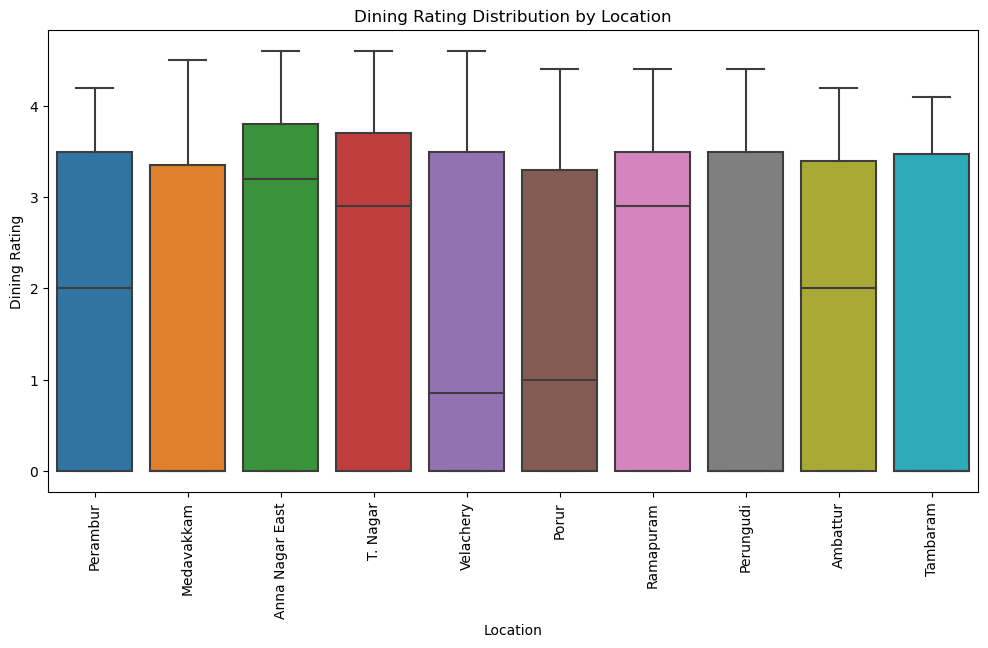

In [106]:
#Dining Rating Distribution by Location
location_counts = zomato_df['Location'].value_counts()
top_10_locations = location_counts.nlargest(10).index
filtered_location_df = zomato_df[zomato_df['Location'].isin(top_10_locations)]
# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Dining Rating', data=filtered_location_df)
plt.xticks(rotation=90)
plt.title('Dining Rating Distribution by Location')
plt.show()


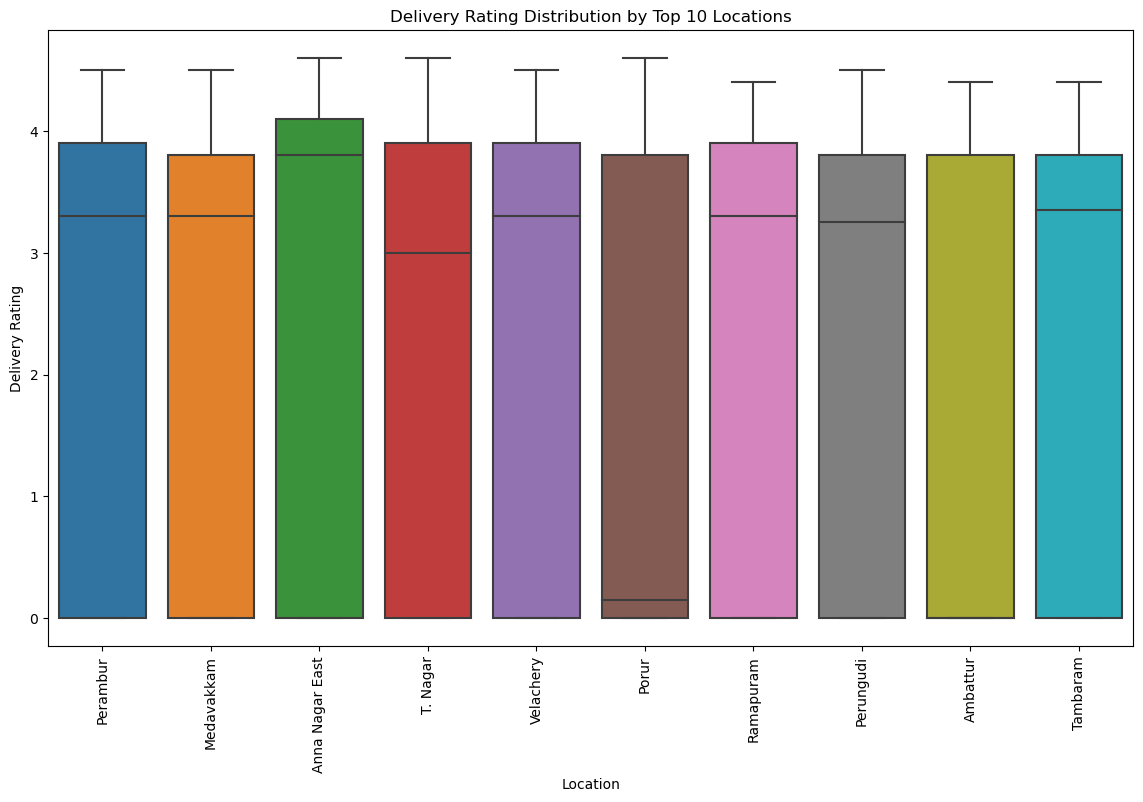

In [107]:
# Calculate frequency of each location
location_counts = zomato_df['Location'].value_counts()

# Select top 10 locations
top_10_locations = location_counts.nlargest(10).index

# Filter DataFrame to include only the top 10 locations
filtered_location_df = zomato_df[zomato_df['Location'].isin(top_10_locations)]

# Plot boxplot for Delivery Rating
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Delivery Rating', data=filtered_location_df)
plt.xticks(rotation=90)
plt.title('Delivery Rating Distribution by Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Delivery Rating')
plt.show()

In [108]:
# Calculate total ratings
zomato_df['Total Ratings'] = zomato_df['Dining Rating Count'] + zomato_df['Delivery Rating Count']

# Calculate average total ratings by location
average_ratings_by_location = zomato_df.groupby('Location')['Total Ratings'].mean().sort_values(ascending=False)
print(average_ratings_by_location)


Location
TNHB Complex, Besant Nagar                          3212.000000
OMR Food Street, Perumbakkam                        2638.666667
DLF IT Park, Ramapuram                              2577.000000
Kipling, East Coast Road (ECR)                      2326.000000
SKLS Galaxy Mall, Redhills                          2308.000000
                                                       ...     
Hotel Anitha Towers, Triplicane                        2.000000
Hotel Peninsula, T. Nagar                              0.000000
Liberty Park Hotel, Kodambakkam                        0.000000
Hotel NRS Sakithyan, T. Nagar                          0.000000
Hotel Sathyam Grand Resort, Kanchipuram District       0.000000
Name: Total Ratings, Length: 268, dtype: float64


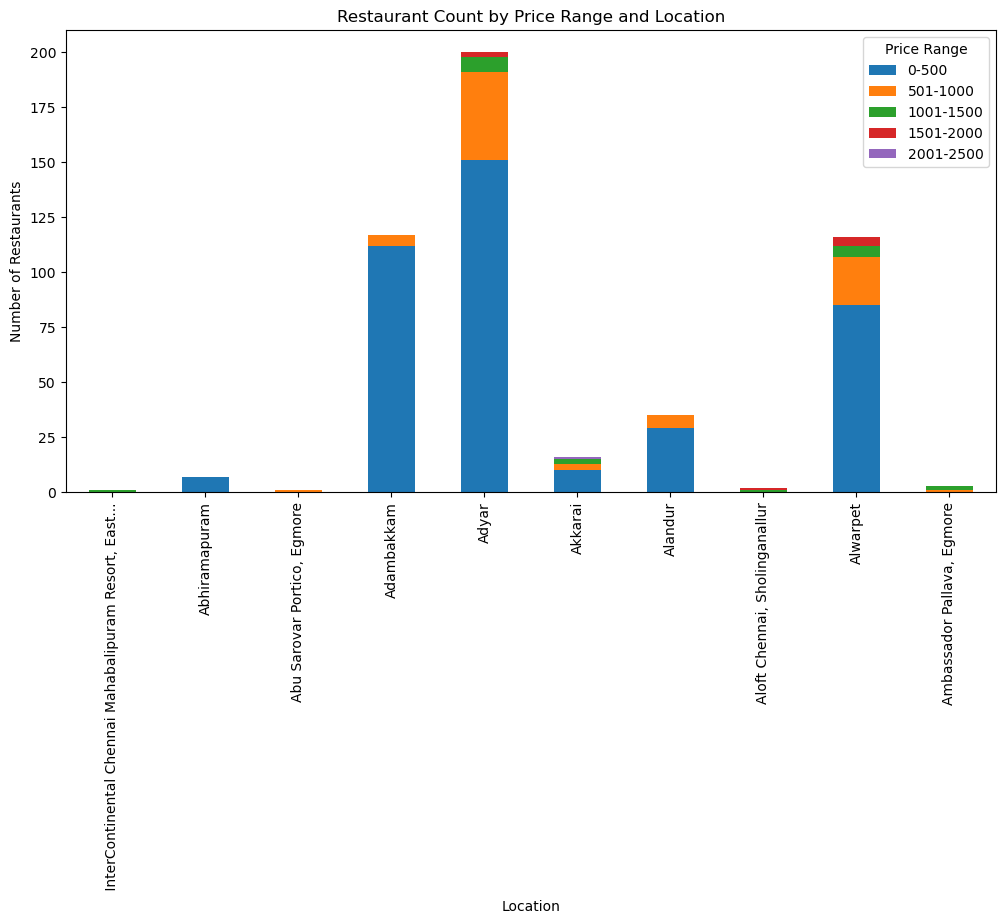

In [109]:
# Plot stacked bar chart
price_range_location_counts = zomato_df.groupby(['Location', 'Price Range']).size().unstack().head(10)
price_range_location_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Restaurant Count by Price Range and Location')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.show()


In [110]:
# Filter restaurants with high delivery and low dining ratings
high_delivery_low_dining = zomato_df[(zomato_df['Delivery Rating'] >= 4.5) & (zomato_df['Dining Rating']< 3.5)]
high_delivery_low_dining[['Name of Restaurant', 'Dining Rating', 'Delivery Rating']]


,Name of Restaurant,Dining Rating,Delivery Rating
1021,Sift and Spoon,0.0,4.5
1274,Bite Me Cupcakes,0.0,4.6
1432,Oink,0.0,4.5
1455,Cafe Clock,0.0,4.5
1776,Casa Dolce,0.0,4.6
2011,Old Mercara,0.0,4.6
2426,Kovai Pazhamudir Nilayam,0.0,4.5
2598,NIC - Natural Ice Creams,0.0,4.5
2865,Hashtag BBQ,0.0,4.5
3158,Biryani In A Box,0.0,4.6


In [111]:
# Filter restaurants with low delivery and high dining ratings
low_delivery_high_dining = zomato_df[(zomato_df['Delivery Rating'] <= 3.5) & (zomato_df['Dining Rating']> 4.5)]
low_delivery_high_dining[['Name of Restaurant', 'Dining Rating', 'Delivery Rating']]

,Name of Restaurant,Dining Rating,Delivery Rating
93,Kappa Chakka Kandhari,4.7,0.0
185,East Coast at Madras Square,4.6,0.0
187,J.Hind - Grand by GRT Hotels,4.7,0.0
199,Arabian Kebab Center,4.6,0.0
229,Vasco's - Hilton Chennai,4.6,0.0
303,Peshawri - ITC Grand Chola,4.6,0.0
395,Southern Spice - Taj Coromandel,4.7,0.0
443,Avartana - ITC Grand Chola,4.8,0.0
445,Dakshin - Crowne Plaza Chennai Adyar Park,4.6,0.0
470,New Pattukottai Kamatchi Mess,4.6,0.0
